In [1]:
import numpy as np
import os
os.chdir('/axp/rim/mldsml/dev/Shaique/ProbR/GBM/Adhoc')
os.getcwd()
import pandas as pd
#from datetime import datetime
import numpy as np 

In [249]:
df = pd.read_excel("Q2_modeling_data.xlsx")

# data treatment

In [251]:
df.head()

,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,day_of_application,levelofeducation_v1,state
0,1234,1,589.26,2998.00,0.0,0,0.000000,24,25452.86,1.0,0,Friday,Post Graduate,Delhi
1,1235,0,9700.00,NaN,89201.0,4,0.000000,43,11000.00,1.0,0,Friday,12th Pass,Madhya Pradesh
2,1236,0,11951.00,8791.75,NaN,18,NaN,20,4351.00,2.0,0,Monday,12th Pass,Telangana
3,1237,0,28228.00,17154.15,19346.0,15,8721.644826,28,25000.00,1.0,0,Wednesday,Graduate,Telangana
4,1238,0,8770.00,775.00,0.0,0,0.000000,22,12647.00,1.0,0,Monday,Graduate,Telangana


In [252]:
df.shape

(579, 14)

In [253]:
df.levelofeducation_v1.value_counts()

12th Pass         165
10th Pass         140
Graduate          127
less than 10th     79
Diploma            43
Post Graduate      25
Name: levelofeducation_v1, dtype: int64

In [254]:
df.state.value_counts()

Karnataka         175
Telangana         127
Maharashtra        92
Tamil Nadu         37
Delhi              30
Rajasthan          22
Gujarat            20
West Bengal        20
Uttar Pradesh      12
Kerala              8
Andhra Pradesh      8
Haryana             7
Orissa              6
Not_Available       5
Madhya Pradesh      4
Punjab              3
Assam               2
Bihar               1
Name: state, dtype: int64

In [255]:
#defining a fucntion to replace categorical variables with default rates of the catogories present in them

In [256]:
def categorical_treator(col,data):
    value_dict={}
    j=list(data[col].unique())
    for vals in j:
        print(vals)
        df2=data[data[col]==vals]
        m=df2.bad_var.mean()
        value_dict.update({vals :m} )
    data=data.replace({col: value_dict})    
    return data

In [ ]:
df=categorical_treator("levelofeducation_v1",df)
df=categorical_treator("day_of_application",df)
df=categorical_treator("state",df)

In [ ]:
#doing the missing value Transformation

In [259]:
for x in df.columns:
    df[x].fillna(df[x].mean(),inplace=True)


In [260]:
df.head()

,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,day_of_application,levelofeducation_v1,state
0,1234,1,589.26,2998.000000,0.000000,0,0.000000,24,25452.86,1.0,0,0.436782,0.440000,0.366667
1,1235,0,9700.00,9678.138141,89201.000000,4,0.000000,43,11000.00,1.0,0,0.436782,0.393939,0.250000
2,1236,0,11951.00,8791.750000,14048.350271,18,3764.460688,20,4351.00,2.0,0,0.405063,0.393939,0.464567
3,1237,0,28228.00,17154.150000,19346.000000,15,8721.644826,28,25000.00,1.0,0,0.443299,0.433071,0.464567
4,1238,0,8770.00,775.000000,0.000000,0,0.000000,22,12647.00,1.0,0,0.405063,0.433071,0.464567


# creating derived variables

In [261]:
df["overdue_last_month/monthly_sal"] = df["overdue_on_outstanding_loans_last_1_month"]/df["monthly_salary"]

In [275]:
df["debit/credit"] = df["Net_debits_last_1_month"]-df["Net_credits_last_1_month"]

In [278]:
df["loan/salary"]=df["Balance_of_outstanding_loans_last_1_month"]/df["monthly_salary"]

In [286]:
df["age/salary"] = df["age"]/df["monthly_salary"]

In [289]:
df["enquiry/accounts"] =df["loan_enquiries_last_1_month"]/df["number_of_bank_accounts"]

In [276]:
df.head()

,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,day_of_application,levelofeducation_v1,state,overdue_last_month/monthly_sal,debit/credit
0,1234,1,589.26,2998.000000,0.000000,0,0.000000,24,25452.86,1.0,0,0.436782,0.440000,0.366667,0.000000,-2408.740000
1,1235,0,9700.00,9678.138141,89201.000000,4,0.000000,43,11000.00,1.0,0,0.436782,0.393939,0.250000,0.000000,21.861859
2,1236,0,11951.00,8791.750000,14048.350271,18,3764.460688,20,4351.00,2.0,0,0.405063,0.393939,0.464567,0.865194,3159.250000
3,1237,0,28228.00,17154.150000,19346.000000,15,8721.644826,28,25000.00,1.0,0,0.443299,0.433071,0.464567,0.348866,11073.850000
4,1238,0,8770.00,775.000000,0.000000,0,0.000000,22,12647.00,1.0,0,0.405063,0.433071,0.464567,0.000000,7995.000000


# Variable Selection

/opt/python/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06790783 0.05745446 0.0572681  0.05409541 0.04449672 0.06956448
 0.06543333 0.05023633 0.02003832 0.07245691 0.06410405 0.08332346
 0.0469523  0.06616413 0.05651117 0.06545725 0.05853574]


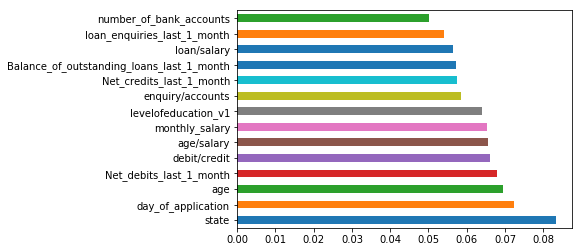

In [290]:

X = df.iloc[:,2:113]  #independent columns
y = df.iloc[:,1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [291]:
import seaborn as sns
X = df.iloc[:,2:113]  #independent columns
y = df.iloc[:,1]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


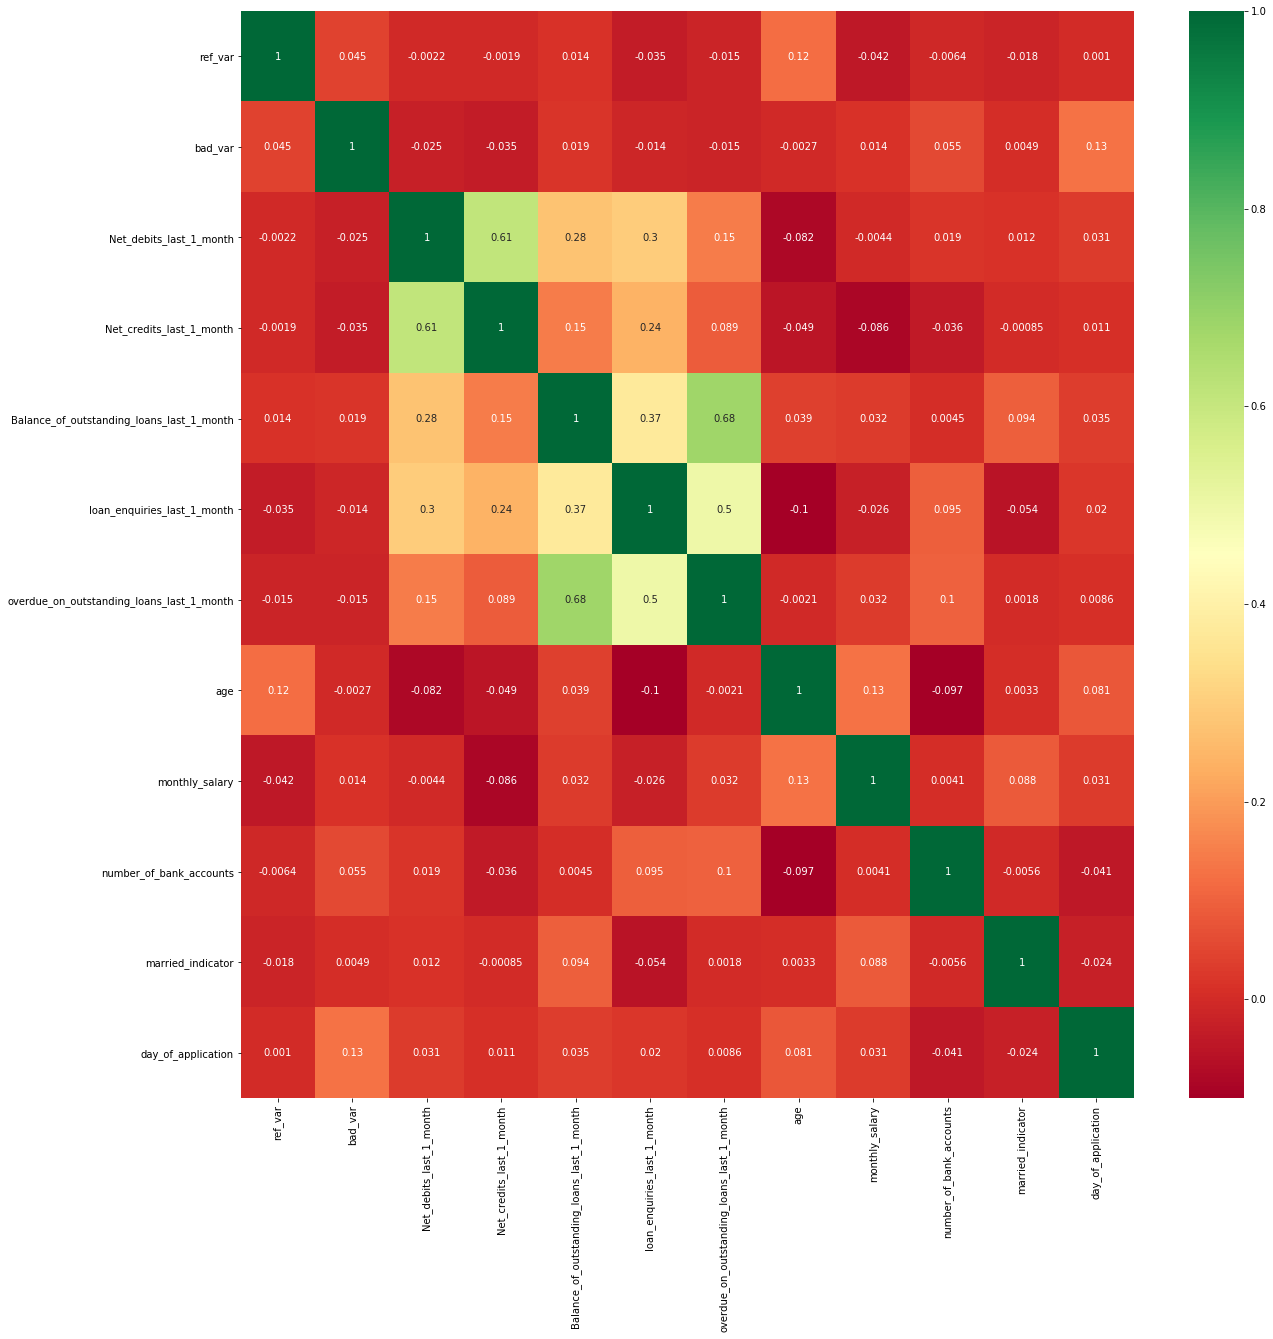

In [292]:
plt.show()

In [ ]:
Since there are less than 20 varaibles we can use all of them in our model.

# Modelling USing XgBoost

In [293]:
df.head()

,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,day_of_application,levelofeducation_v1,state,overdue_last_month/monthly_sal,debit/credit,loan/salary,age/salary,enquiry/accounts
0,1234,1,589.26,2998.000000,0.000000,0,0.000000,24,25452.86,1.0,0,0.436782,0.440000,0.366667,0.000000,-2408.740000,0.000000,0.000943,0.0
1,1235,0,9700.00,9678.138141,89201.000000,4,0.000000,43,11000.00,1.0,0,0.436782,0.393939,0.250000,0.000000,21.861859,8.109182,0.003909,4.0
2,1236,0,11951.00,8791.750000,14048.350271,18,3764.460688,20,4351.00,2.0,0,0.405063,0.393939,0.464567,0.865194,3159.250000,3.228764,0.004597,9.0
3,1237,0,28228.00,17154.150000,19346.000000,15,8721.644826,28,25000.00,1.0,0,0.443299,0.433071,0.464567,0.348866,11073.850000,0.773840,0.001120,15.0
4,1238,0,8770.00,775.000000,0.000000,0,0.000000,22,12647.00,1.0,0,0.405063,0.433071,0.464567,0.000000,7995.000000,0.000000,0.001740,0.0


In [294]:
df_model = df.copy()

In [295]:
df_model.head()

,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,day_of_application,levelofeducation_v1,state,overdue_last_month/monthly_sal,debit/credit,loan/salary,age/salary,enquiry/accounts
0,1234,1,589.26,2998.000000,0.000000,0,0.000000,24,25452.86,1.0,0,0.436782,0.440000,0.366667,0.000000,-2408.740000,0.000000,0.000943,0.0
1,1235,0,9700.00,9678.138141,89201.000000,4,0.000000,43,11000.00,1.0,0,0.436782,0.393939,0.250000,0.000000,21.861859,8.109182,0.003909,4.0
2,1236,0,11951.00,8791.750000,14048.350271,18,3764.460688,20,4351.00,2.0,0,0.405063,0.393939,0.464567,0.865194,3159.250000,3.228764,0.004597,9.0
3,1237,0,28228.00,17154.150000,19346.000000,15,8721.644826,28,25000.00,1.0,0,0.443299,0.433071,0.464567,0.348866,11073.850000,0.773840,0.001120,15.0
4,1238,0,8770.00,775.000000,0.000000,0,0.000000,22,12647.00,1.0,0,0.405063,0.433071,0.464567,0.000000,7995.000000,0.000000,0.001740,0.0


In [297]:
df.shape

(579, 19)

In [ ]:

#splitting inti train and test 
df_model = df.copy()

In [298]:
df_model_train = df_model[:450]
df_model_test = df_model[450:579]

In [299]:
df_model_train.head()

,ref_var,bad_var,Net_debits_last_1_month,Net_credits_last_1_month,Balance_of_outstanding_loans_last_1_month,loan_enquiries_last_1_month,overdue_on_outstanding_loans_last_1_month,age,monthly_salary,number_of_bank_accounts,married_indicator,day_of_application,levelofeducation_v1,state,overdue_last_month/monthly_sal,debit/credit,loan/salary,age/salary,enquiry/accounts
0,1234,1,589.26,2998.000000,0.000000,0,0.000000,24,25452.86,1.0,0,0.436782,0.440000,0.366667,0.000000,-2408.740000,0.000000,0.000943,0.0
1,1235,0,9700.00,9678.138141,89201.000000,4,0.000000,43,11000.00,1.0,0,0.436782,0.393939,0.250000,0.000000,21.861859,8.109182,0.003909,4.0
2,1236,0,11951.00,8791.750000,14048.350271,18,3764.460688,20,4351.00,2.0,0,0.405063,0.393939,0.464567,0.865194,3159.250000,3.228764,0.004597,9.0
3,1237,0,28228.00,17154.150000,19346.000000,15,8721.644826,28,25000.00,1.0,0,0.443299,0.433071,0.464567,0.348866,11073.850000,0.773840,0.001120,15.0
4,1238,0,8770.00,775.000000,0.000000,0,0.000000,22,12647.00,1.0,0,0.405063,0.433071,0.464567,0.000000,7995.000000,0.000000,0.001740,0.0


In [331]:

y = pd.DataFrame(df_model_train["bad_var"])

h=pd.DataFrame(df_model_train.drop('bad_var', axis=1))


import xgboost as xgb
print(xgb.__version__)

dtrain = xgb.DMatrix(h, label=y)

param = {
    'max_depth': 5,  
    'learning_rate': .1,  
    'objective':'reg:linear',
    'min_child_weight':100,
    'tree_method':'exact'
    
}



model = xgb.train(param, dtrain,num_boost_round=1000)

filename = 'model_xgb_Avid.sav'
pickle.dump(model, open(filename, 'wb'))





0.90
[12:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [332]:
#scoring the model

In [333]:

y = pd.DataFrame(df_model_test["bad_var"])

h=pd.DataFrame(df_model_test.drop('bad_var', axis=1))

import xgboost as xgb
print(xgb.__version__)

dtest = xgb.DMatrix(h, label=y)

filename = 'model_xgb_Avid.sav'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(dtest,pred_leaf=False)

a = list(y_pred)


t=pd.DataFrame(a,columns=["pred"])

t["Actual_price"] = list(y["bad_var"])

t.to_csv("Avid_score.csv",index=False)


0.90
[12:43:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [334]:
#evaluating the score

In [335]:
scores = pd.read_csv("Avid_score.csv")

In [337]:
scores.head()

,pred,Actual_price
0,0.358419,0
1,-0.016967,1
2,0.460737,1
3,0.336805,0
4,0.491663,1


In [339]:
from sklearn.metrics import confusion_matrix

In [359]:
cut_off=0.5
scores.loc[(scores.pred <cut_off),'scores_class']=0
scores.loc[(scores.pred >cut_off),'scores_class']=1


In [360]:
predicted=scores["scores_class"]
Y_test =scores["Actual_price"]
matrix = confusion_matrix(Y_test, predicted)

In [361]:
matrix

array([[55, 25],
       [37, 12]])

In [365]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, predicted))

0.5193798449612403


In [366]:
print(metrics.recall_score(Y_test, predicted))

0.24489795918367346


In [367]:
print(metrics.precision_score(Y_test, predicted))

0.32432432432432434


In [363]:
Accuracy

55.093023255813954